In [80]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

In [81]:
df = pd.read_csv("train.csv")
df['class'] = 'train'
test = pd.read_csv("test.csv")
test['class'] = 'test'
df = df.append(test)

In [82]:
df.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
class           object
dtype: object

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
class          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


#Get rid of useless variables

In [84]:
df.drop(['Cabin','Ticket','Name', 'Fare', 'Embarked'], axis=1, inplace=True)
df.head()

,Age,Parch,PassengerId,Pclass,Sex,SibSp,Survived,class
0,22,0,1,3,male,1,0,train
1,38,0,2,1,female,1,1,train
2,26,0,3,3,female,0,1,train
3,35,0,4,1,female,1,1,train
4,35,0,5,3,male,0,0,train


#Variable analysis - Age

In [85]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

There are many missing values...

##How to fill age?

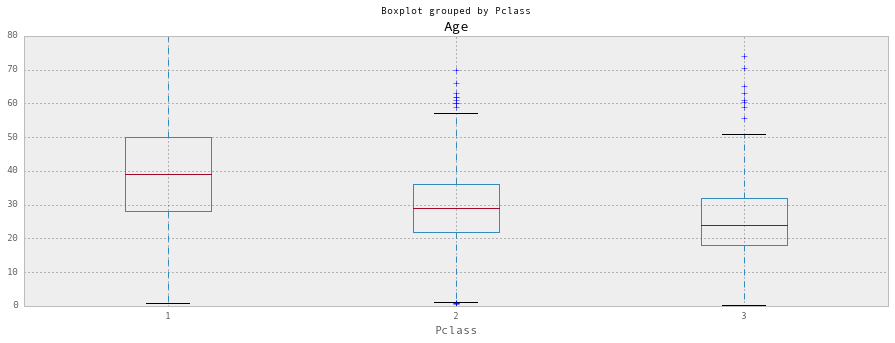

In [86]:
df.boxplot(column='Age', by='Pclass')

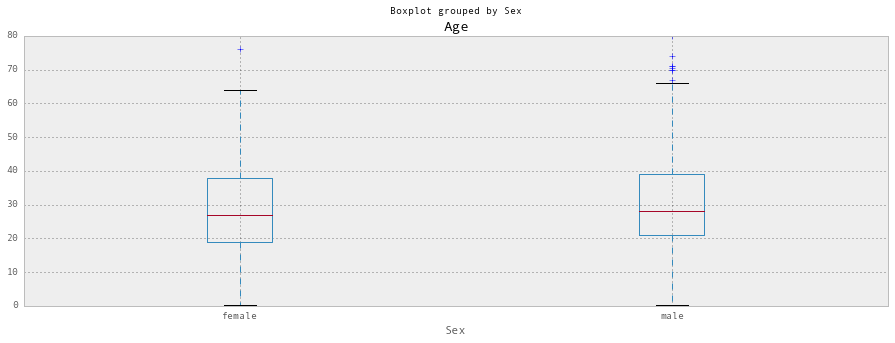

In [87]:
df.boxplot(column='Age', by='Sex')

Let's use Pclass to estimate the age, using the median por each Pclass

In [88]:
median_ages = df[['Pclass','Age','Sex']].groupby(['Pclass','Sex']).median()
median_ages

Age
Pclass Sex         
1      female  36.0
       male    42.0
2      female  28.0
       male    29.5
3      female  22.0
       male    25.0

In [89]:
def estimate_age(row):
    if pd.isnull(row.Age):
        return float(median_ages.ix[row.Pclass].ix[row.Sex])
    return row.Age

In [90]:
df['EstimatedAge'] = df.apply(estimate_age, axis=1)
df.drop('Age', axis=1, inplace=True)

In [91]:
df.head()

,Parch,PassengerId,Pclass,Sex,SibSp,Survived,class,EstimatedAge
0,0,1,3,male,1,0,train,22
1,0,2,1,female,1,1,train,38
2,0,3,3,female,0,1,train,26
3,0,4,1,female,1,1,train,35
4,0,5,3,male,0,0,train,35


#Variable analysis - Embarked

In [92]:
#embarked_percentage = df[df.Survived==1 & ~df.Embarked.isnull()][['Embarked', 'Survived']].groupby('Embarked').count()/df[df.Survived==1 & ~df.Embarked.isnull()].shape[0]
#embarked_percentage.plot(kind='bar')

#Generating clean datasets

In [93]:
#Convert object variables to int
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
#df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [94]:
df.head()

,Parch,PassengerId,Pclass,Sex,SibSp,Survived,class,EstimatedAge
0,0,1,3,1,1,0,train,22
1,0,2,1,0,1,1,train,38
2,0,3,3,0,0,1,train,26
3,0,4,1,0,1,1,train,35
4,0,5,3,1,0,0,train,35


In [95]:
train = df[df['class']=='train']
test = df[df['class']=='test']
train.drop('class', axis=1, inplace=True)
test.drop('class', axis=1, inplace=True)
test.drop('Survived', axis=1, inplace=True)

/Users/Edu/Envs/notebook/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Edu/Envs/notebook/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Edu/Envs/notebook/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [96]:
train.to_csv("train_clean.csv", index=False)
test.to_csv("test_clean.csv", index=False)